In [4]:
# Our standard imports :)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.container { font-size:16px !important; }</style>"))
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=False)

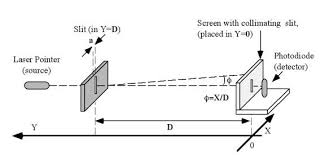

### Diffraction 

The goal now is to plot diffraction patterns for variou setups. We will try to use as real values as possible.

Spend some time discussing about these: 

In [5]:
b = 0.1E-3 # width of the slit

R = 2 # distance to the screen in meters 

llambda = 632.8E-9 # wavelengt of the laser in m # This is actually He-Ne laser ;) 


theta = np.linspace(-3,3,1000) # angle in degrees, avoid zero on purpose

k = 2*np.pi/llambda 

beta = k * b * theta * np.pi/180.0 / 2.

I = (np.sin(beta)/beta)**2.0 # Diffraction pattern. That is: Distribution of the irradiance with angle

Text(0, 0.5, 'I')

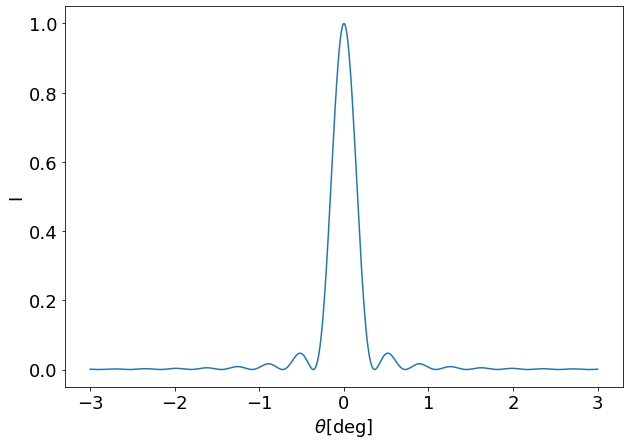

In [6]:
plt.figure(figsize=[10,7])
plt.plot(theta,I)
plt.xlabel("$\\theta $[deg]")
plt.ylabel("I")

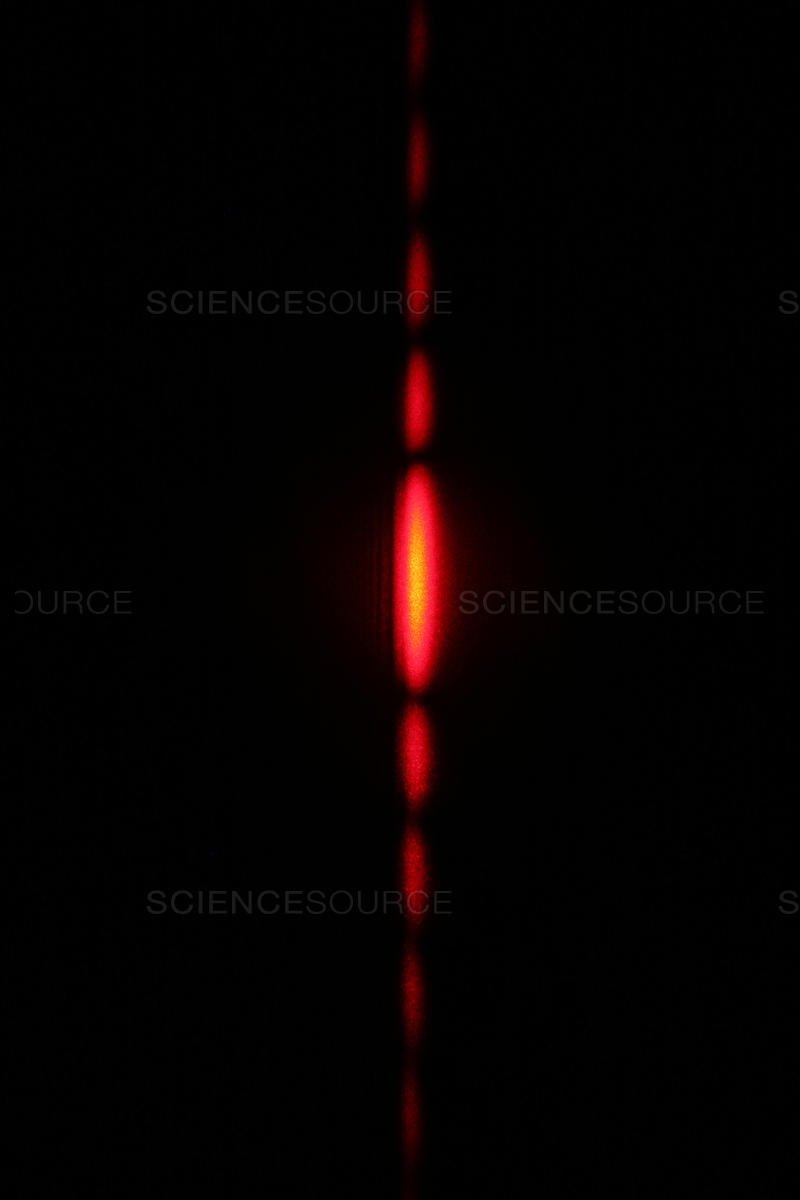

Text(0, 0.5, 'I')

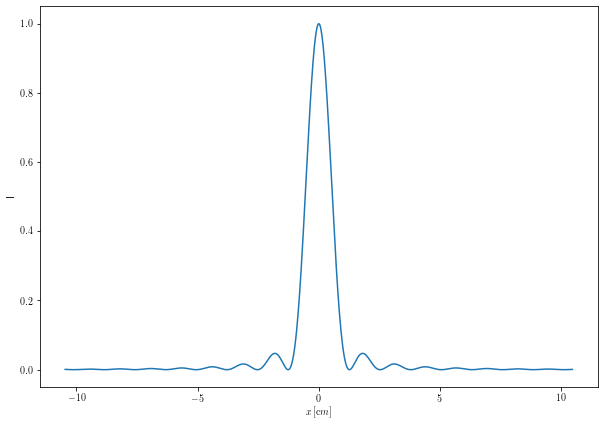

In [4]:
# If you feel more at ease, we can plot this using dependence on x coordinate on slit instead:

x_screen = np.sin(theta * np.pi / 180.0) * R 

plt.figure(figsize=[10,7])
plt.plot(x_screen*100,I)
plt.xlabel("$x\,[{\mathrm cm}]$")
plt.ylabel("I")

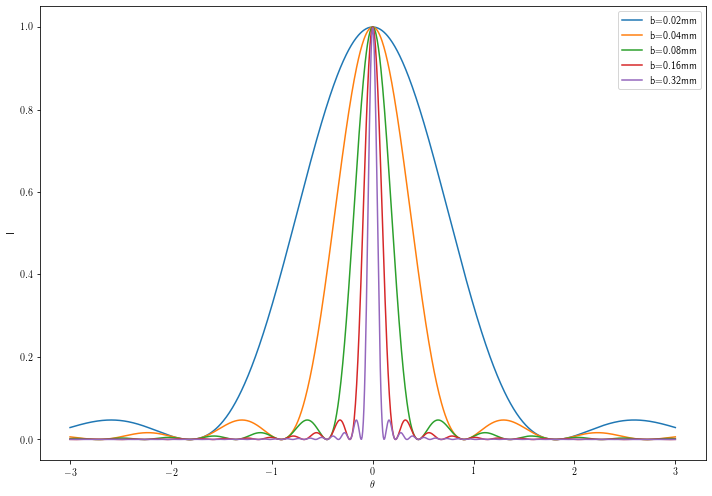

In [5]:
# Works! 
# We can now try the same using different diameters.

b = 0.02E-3 # This is very narrow :) 

plt.figure(figsize=[10,7])
k = 2*np.pi/llambda
    
for i in range(0,5):
    
    beta = k * b * theta * np.pi/180.0 / 2.
    I = (np.sin(beta)/beta)**2.0
    plt.plot(theta,I,label='b='+str(b*1E3)+'mm')
    b*=2.0

plt.xlabel("$\\theta$")
plt.ylabel("I")
plt.legend()
plt.tight_layout()
    

What can you conclude now, do the limits now make more sense? 

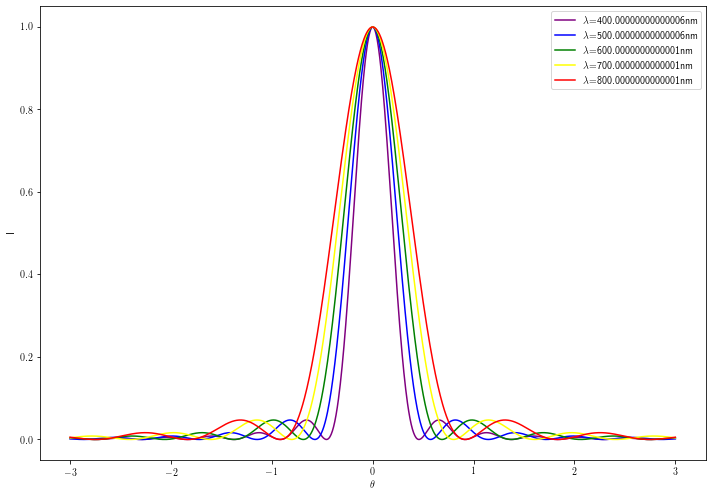

In [6]:
# Let's now do the same, using different wavelengths :) 

b = 0.05E-3 

plt.figure(figsize=[10,7])

lambdas = np.array([400.,500.,600.,700.,800.]) * 1E-9
colors=['purple','blue','green','yellow','red'] # These don't exactly correspond to the wavelengths.:)

for i in range(0,5):
    k = 2*np.pi/lambdas[i]
    beta = k * b * theta * np.pi/180.0 / 2.
    I = (np.sin(beta)/beta)**2.0
    plt.plot(theta,I,label='$\lambda$='+str(lambdas[i]*1E9)+'nm',color=colors[i])

plt.xlabel("$\\theta$")
plt.ylabel("I")
plt.legend()
plt.tight_layout()

The main idea here is that we can obviously use the diffraction to separate wavelengths!

## Two-slit patterns:

Text(0, 0.5, 'I')

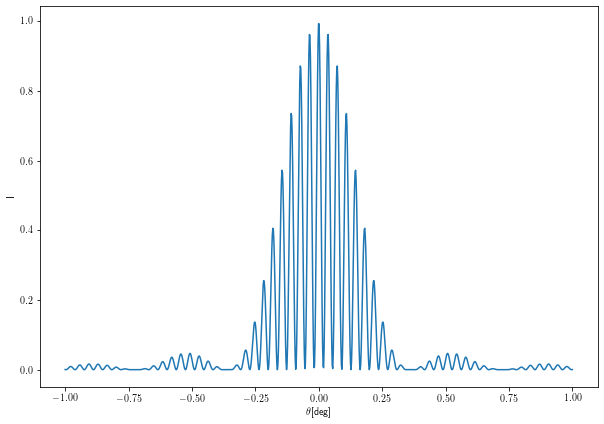

In [7]:
b = 0.1E-3 # width of the slit
d = 1E-3 #distance between the slits

R = 2 # distance to the screen in meters 

llambda = 632.8E-9 # wavelengt of the laser in m # This is actually He-Ne laser ;) 


theta = np.linspace(-1,1,1000) # angle in degrees, avoid zero on purpose

k = 2*np.pi/llambda 

beta = k * b * theta * np.pi/180.0 / 2.
delta= k* d * theta * np.pi/180.0 / 2.

I = (np.sin(beta)/beta)**2.0 * np.cos(delta)**2.0 # Diffraction pattern. That is: Distribution of the irradiance with angle
plt.figure(figsize=[10,7])
plt.plot(theta,I)
plt.xlabel("$\\theta $[deg]")
plt.ylabel("I")

### 2-D diffraction! 

Turns out 2D diffraction is just product of two 1D slits, in a way (of course, takea look at the notes first).

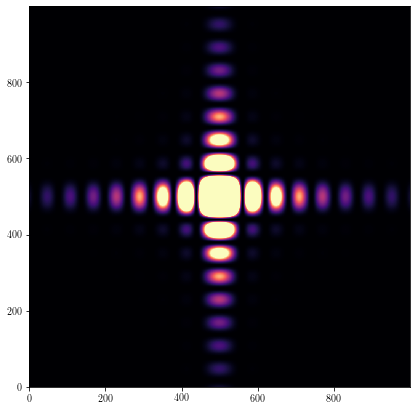

In [8]:
a = 0.1E-3 # width of the slit
b = 0.1E-3 # height of the slit

R = 2 # distance to the screen in meters 

llambda = 632.8E-9 # wavelengt of the laser in m # This is actually He-Ne laser ;) 

phi = np.linspace(-3,3,1000) # angle in degrees, avoid zero on purpose
theta = np.linspace(-3,3,1000) # angle in degrees, avoid zero on purpose

k = 2*np.pi/llambda 

alpha = k * a * phi * np.pi/180.0 / 2.
beta = k * b * theta * np.pi/180.0 / 2.


I = ((np.sin(alpha)/alpha)**2.0)[:,None] * ((np.sin(beta)/beta)**2.0)[None,:]  # Diffraction pattern. That is: Distribution of the irradiance with angle

#I = np.clip(I,0,0.001)

plt.figure(figsize=[10,7])
plt.imshow(I.T,cmap='magma',origin='Lower',vmax=0.01)

#plt.xlabel("$\\theta $[deg]")
#plt.ylabel("I")




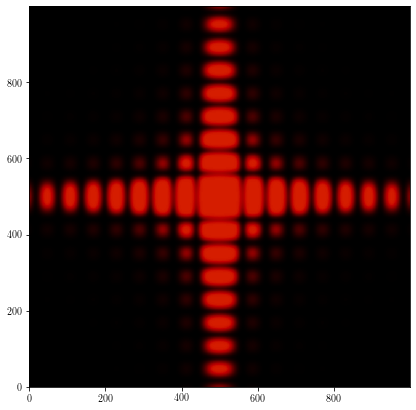

In [9]:
from scipy.ndimage import gaussian_filter 

I = np.clip(I,0,0.001)
I = gaussian_filter(I,(5,5))

plt.figure(figsize=[10,7])
plt.imshow(I.T,cmap='gist_heat',vmax=0.0018,origin='Lower')

How does the real one look like? 

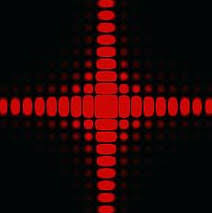

Not bad eh! 

### Diffraction grating! 

In [11]:
# We just derived expression for diffraction gratign, let's put it in a function

def diff_grating(b,d,N,k,theta):
    
    beta = k*theta*b/2.0
    gamma = k*theta*d/2.0
    
    return (np.sin(beta)/beta * np.sin(N*gamma)/np.sin(gamma))**2.0

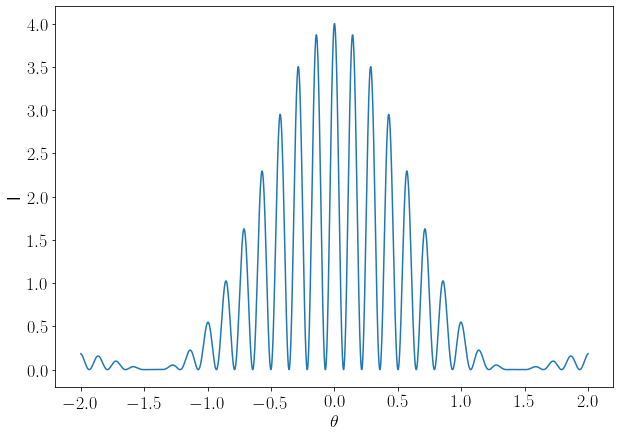

In [43]:
llambda = 500E-9
k = 2.*np.pi/llambda
b = 0.02E-3
d = 0.2E-3 
N = 2
theta = np.linspace(-2,2,3000)

I_2slits = diff_grating(b,d,N,k,theta*np.pi/180.0)
plt.figure(figsize=[10,7])
plt.plot(theta,I_2slits)
plt.xlabel("$\\theta$")
plt.ylabel("I")
plt.savefig("2slits.png",bbox_inches='tight')


ValueError: x and y must have same first dimension, but have shapes (3000,) and (1000,)

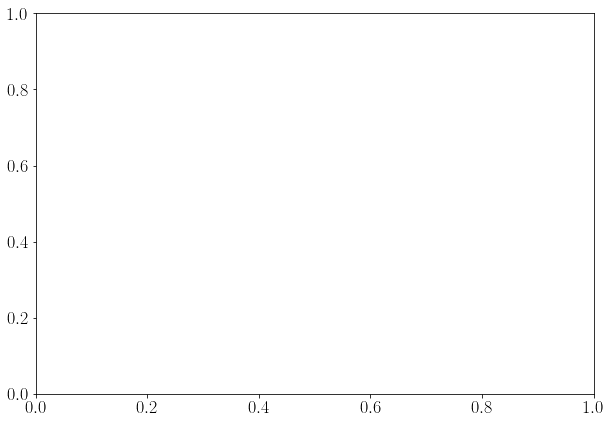

In [44]:
llambda = 500E-9
k = 2.*np.pi/llambda
b = 0.02E-3
d = 0.2E-3 
N = 5
theta = np.linspace(-2,2,3000)

I_5slits = diff_grating(b,d,N,k,theta*np.pi/180.0)
plt.figure(figsize=[10,7])
plt.plot(theta,I_3slits)
plt.xlabel("$\\theta$")
plt.ylabel("I")
plt.savefig("3slits.png",bbox_inches='tight')


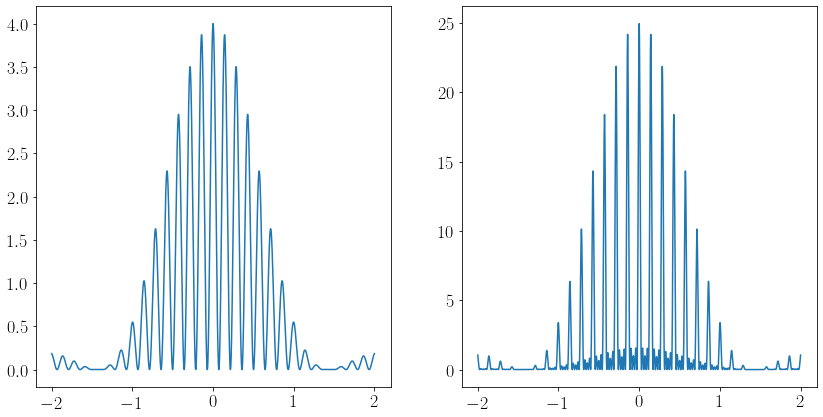

In [45]:
plt.figure(figsize=[14,7])
plt.subplot(121)
plt.plot(theta,I_2slits)
plt.subplot(122)
plt.plot(theta,I_5slits)

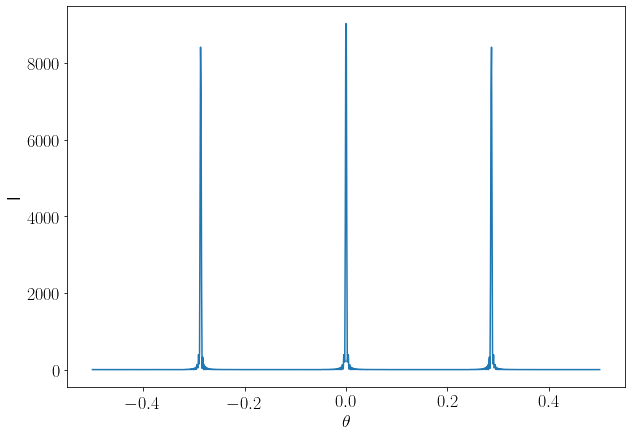

In [48]:
llambda = 500E-9
k = 2.*np.pi/llambda
b = 0.02E-3
d = 0.1E-3 
N = 100
theta = np.linspace(-0.5,0.5,1000)

I = diff_grating(b,d,N,k,theta*np.pi/180.0)
plt.figure(figsize=[10,7])
plt.plot(theta,I)
plt.xlabel("$\\theta$")
plt.ylabel("I")
plt.savefig("10slits.png",bbox_inches='tight')


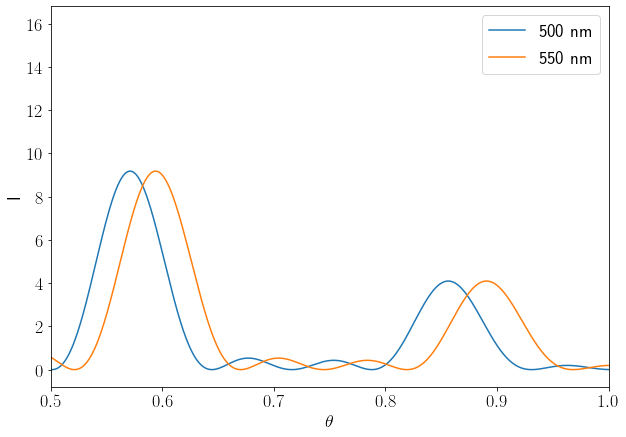

In [57]:
llambda1 = 500E-9
k1 = 2.*np.pi/llambda1
llambda2 = 520E-9
k2 = 2.*np.pi/llambda2

b = 0.02E-3
d = 0.1E-3 
N = 4
theta = np.linspace(-3,3,10000)

I1 = diff_grating(b,d,N,k1,theta*np.pi/180.0)
I2 = diff_grating(b,d,N,k2,theta*np.pi/180.0)
plt.figure(figsize=[10,7])
plt.plot(theta,I1,label="500 nm")
plt.plot(theta,I2,label="550 nm")
plt.xlabel("$\\theta$")
plt.ylabel("I")
plt.savefig("100slits_wvl.png",bbox_inches='tight')
plt.xlim([0.5,1])
plt.legend()
